## In the second, I investigated the subset of the 2018 Kaggle ML & DS Survey from Kaggle.com.

In [167]:
import warnings
warnings.filterwarnings("ignore")

In [168]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
from pylab import rcParams
rcParams['figure.figsize'] = 20,15
rcParams.update({'font.size': 22})
sns.set(font_scale=1.5)

In [169]:
df_multipleChoice = pd.read_csv('E:\\KSE\\DS\\Course Project\\kagle\\_multipleChoiceResponses.csv', low_memory=False)

In [170]:
# getting questions
multipleChoice_q = pd.read_csv('E:\\KSE\\DS\\Course Project\\kagle\\multipleChoiceResponses.csv', low_memory=False, nrows=1)

In [4]:
multipleChoice_q['Q16_Part_1']

0    What programming languages do you use on a reg...
Name: Q16_Part_1, dtype: object

In [152]:
# i got all columns of multiple Choice Responses from QX_Part_1 to QX_Part_N
def got_count_q(X, N, df, kind):
    naim_columns = "Q" + str(X) + "_Part_"
    columns = [naim_columns + '1']
    for i in range(2,N):
        columns.append(naim_columns + str(i))
    
    value = []
    count = []
    for col in columns:
        val = df[col].value_counts()
        if not val.empty:
            value.append(df[col].value_counts().index.values[0])
            count.append(df[col].value_counts().values[0])

    count_df = pd.DataFrame({'tool':value,
                                'count':count,
                                'data':kind}) 

    count_df = count_df.drop(count_df[(count_df.tool == 'None')].index)
    count_df.sort_values(['count'], inplace=True, ascending=False)
  
    return count_df

# draw of cloud for words or phrases
# df - dataframe
# x - nubber of question
def cloud_df(df, x):
    value_dict = dict(zip(df['tool'],df['count']))
    wc = WordCloud(background_color='white', collocations=False)
    wc.generate_from_frequencies(dict(value_dict))
    plt.figure(figsize=(20,20))
    q = str(multipleChoice_q['Q16_Part_'+str(x)].values)
    f = q.rfind('?') + 1
    qtext = q[2:f]
    plt.title(qtext)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wc,interpolation="bilinear")

def plot_df(df):
    p = sns.barplot(x="count", y="tool", data=df)
     #_ = plt.setp(p.get_xticklabels())  # Rotate labels , rotation=45

## For me personally, this survey is very interesting. And I wanted to get all answers from that. Just quickly observe for certain of its:

In [9]:
def qet_answer_dict(number):
    val = df_multipleChoice['Q'+str(number)].value_counts().index.values 
    val_c = df_multipleChoice['Q'+str(number)].value_counts().values
    return dict(zip(val,val_c))

### What specific programming language do you use most often?

In [11]:
qet_answer_dict(17)

{'Python': 8180,
 'R': 2046,
 'SQL': 1211,
 'Java': 903,
 'C/C++': 739,
 'C#/.NET': 432,
 'Javascript/Typescript': 408,
 'MATLAB': 355,
 'SAS/STATA': 228,
 'PHP': 191,
 'Visual Basic/VBA': 135,
 'Other': 117,
 'Scala': 106,
 'Bash': 59,
 'Ruby': 55,
 'Go': 46,
 'Julia': 11}

### much tech languages got top positions after Python, R, and SQL such as Java, C/C++, C#/.NET,  Javascript/Typescript. To implement ML solution to product requires using low-level programming languages to raise competitive of one's.

### Programming language you recommend an aspiring data scientist to learn first?

In [12]:
qet_answer_dict(18)

{'Python': 14181,
 'R': 2342,
 'SQL': 914,
 'C++': 339,
 'MATLAB': 256,
 'Java': 184,
 'Other': 161,
 'None': 132,
 'Scala': 74,
 'Javascript': 72,
 'SAS': 69,
 'VBA': 38,
 'Go': 26}

# We could see the Python is most popular language for using and advising to learn.

## ML library used the most?

In [13]:
qet_answer_dict(20)

{'Scikit-Learn': 6039,
 'TensorFlow': 1949,
 'Keras': 1728,
 'randomForest': 598,
 'Caret': 589,
 'PyTorch': 588,
 'Xgboost': 547,
 'Spark MLlib': 199,
 'lightgbm': 170,
 'H20': 132,
 'Fastai': 127,
 'Other': 103,
 'mlr': 62,
 'Caffe': 62,
 'Mxnet': 31,
 'catboost': 26,
 'Prophet': 26,
 'CNTK': 13}

## To train deep learning models data scientists have to use high-level APIs like TensorFlow, Keras etceteras.

### Specific data visualization library or tool you used the most?

In [14]:
qet_answer_dict(22)

{'Matplotlib': 6707,
 'ggplot2': 2877,
 'Seaborn': 1334,
 'Plotly': 540,
 'D3': 243,
 'Shiny': 199,
 'Other': 110,
 'Bokeh': 77,
 'Leaflet': 39,
 'Lattice': 33,
 'Altair': 16,
 'Geoplotlib': 9}

### Type of data that you currently interact with most often?

In [15]:
qet_answer_dict(32)

{'Numerical Data': 3588,
 'Tabular Data': 2680,
 'Text Data': 2005,
 'Time Series Data': 1664,
 'Image Data': 1635,
 'Categorical Data': 998,
 'Sensor Data': 494,
 'Geospatial Data': 257,
 'Video Data': 204,
 'Genetic Data': 173,
 'Audio Data': 117,
 'Other Data': 63}

# What programming languages do you use on a regular basis?

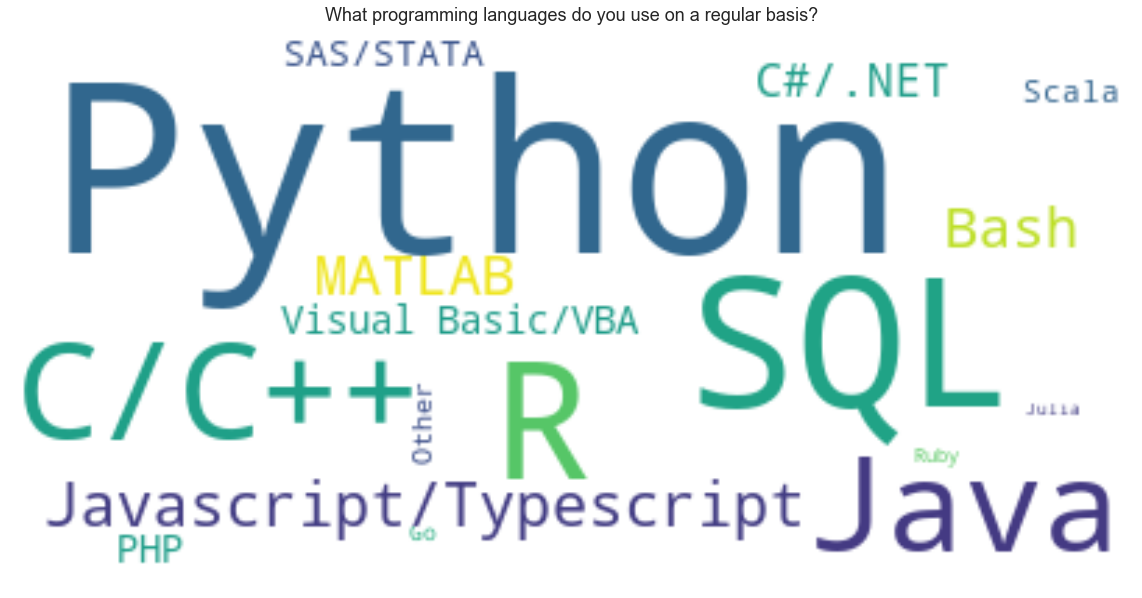

In [36]:
# the number of question is 16, 19 - a quantity of multiple Choice Responses
all_df = got_count_q(16, 19, df_multipleChoice, 'All')
cloud_df(all_df, 16)

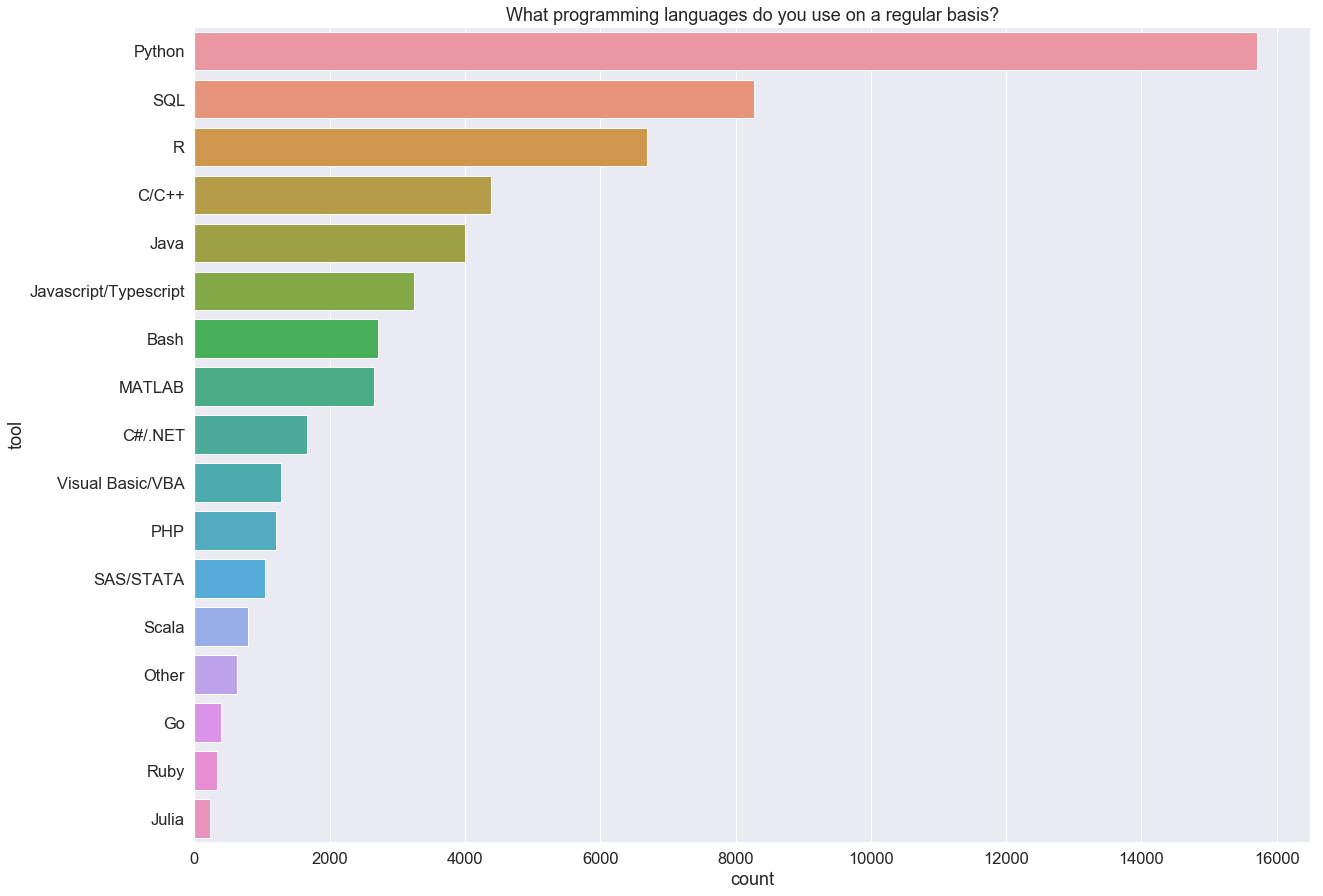

In [45]:
#count - count of respondents 
plt.figure(figsize=(20,15))
plt.title('What programming languages do you use on a regular basis?')
plot_df(all_df)

In [59]:
#Designation or Title
list_of_title = df_multipleChoice['Q6'].value_counts().index.values
list_of_title

array(['Student', 'Data Scientist', 'Software Engineer', 'Data Analyst',
       'Other', 'Research Scientist', 'Not employed', 'Consultant',
       'Business Analyst', 'Data Engineer', 'Research Assistant',
       'Manager', 'Product/Project Manager', 'Chief Officer',
       'Statistician', 'DBA/Database Engineer', 'Developer Advocate',
       'Marketing Analyst', 'Salesperson', 'Principal Investigator',
       'Data Journalist'], dtype=object)

In [38]:
#i got the data for only "Data Scientist" or "Data Analyst"
filt_df = df_multipleChoice.drop(df_multipleChoice[(df_multipleChoice.Q6 != 'Data Scientist')
                                                   &(df_multipleChoice.Q6 != 'Data Analyst')].index)

In [61]:
#check
list_of_title = filt_df['Q6'].value_counts().index.values
list_of_title

array(['Data Scientist', 'Data Analyst'], dtype=object)

# I filtered answers on "What programming languages do you use on a regular basis?" for Data Analyst and Data Scientist

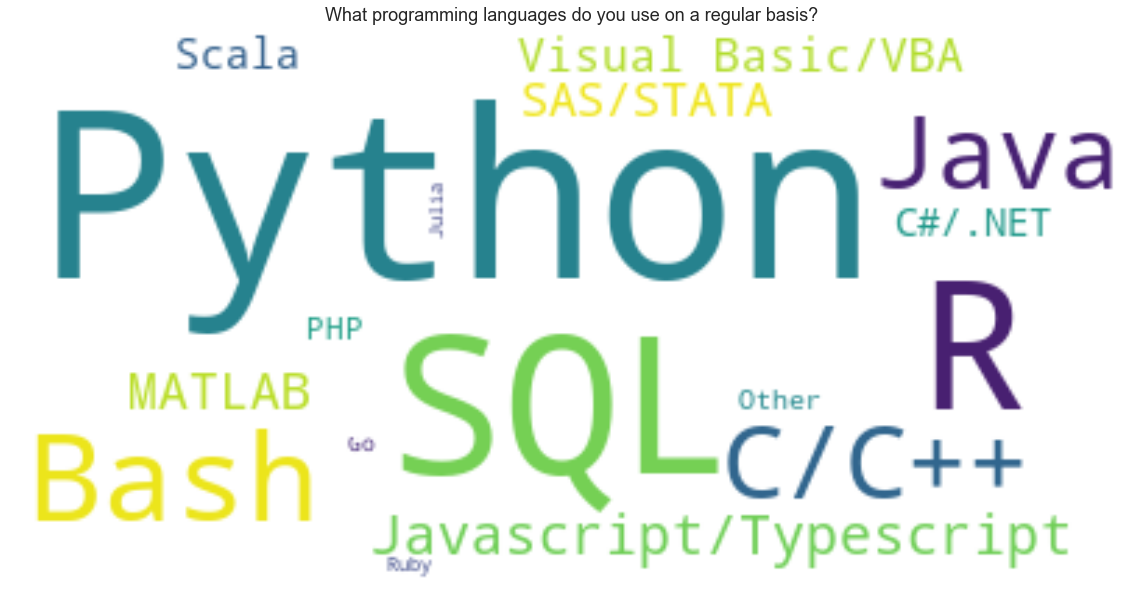

In [56]:
#i got the summarising of tools only for Data Analyst and Data Scientist
# the number of question is 16, 19 - a quantity of multiple Choice Responses
f_df = got_count_q(16, 19, filt_df, 'SC')
cloud_df(f_df, 16)

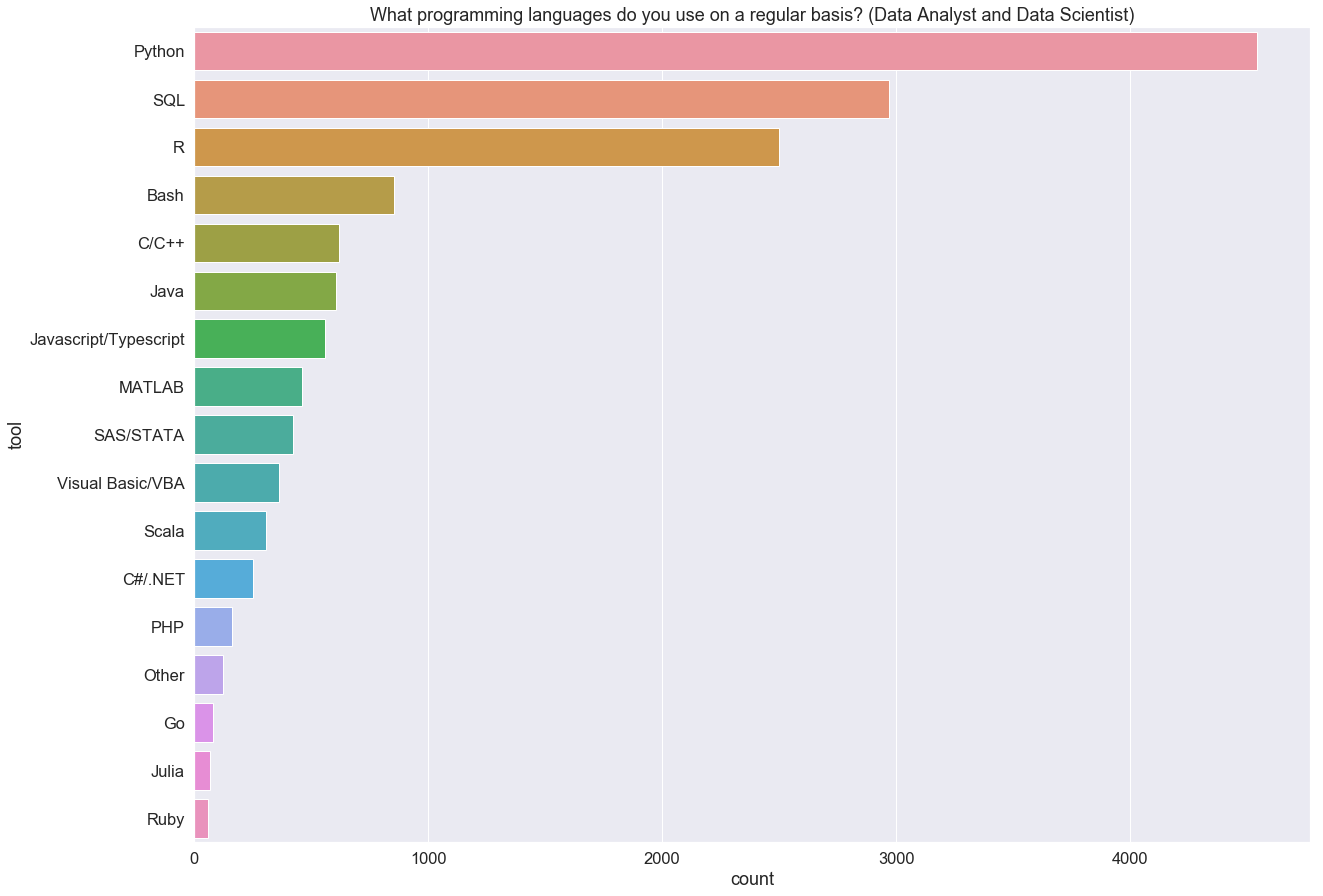

In [57]:
plt.figure(figsize=(20,15))
plt.title('What programming languages do you use on a regular basis? (Data Analyst and Data Scientist)')
plot_df(f_df)

# We could compare results from Indeed and Kagle into one table

In [64]:
f_df = f_df.reset_index()
all_df = all_df.reset_index()
result = pd.merge(all_df, f_df, left_index=True, right_index=True, how='inner')
indeed_df = pd.read_csv('E:\\KSE\\DS\\Course Project\\Indeen_lang.csv')
result = pd.merge(result, indeed_df, left_index=True, right_index=True, how='inner')
result = result[['tool_x','tool_y','tool']]
result = result.rename(columns={"tool_x": "Kagle raw", 'tool_y': "Kagle science", 'tool': "Indeed jop prop"})
result['Indeed jop prop'] = result[['Indeed jop prop']].applymap(lambda x: x.capitalize())

In [65]:
result

,Kagle raw,Kagle science,Indeed jop prop
0,Python,Python,Python
1,SQL,SQL,R
2,R,R,Sql
3,C/C++,Bash,Spark
4,Java,C/C++,Hadoop
5,Javascript/Typescript,Java,Java
6,Bash,Javascript/Typescript,Sas
7,MATLAB,MATLAB,C
8,C#/.NET,SAS/STATA,Tableau
9,Visual Basic/VBA,Visual Basic/VBA,Cloud


## The first two columns (Kaggle sample for all respondents and only for Data Analyst and Data Scientist) do not have a big difference. We may use this as evidence to support the statement that "Python" still a most popular language for machine learning area.
## And than "SQL", "R", "Java", "C/C++" took up top positions.
## And we also see Exel tends to decrease of count of using but still requered for hiring. I could conjecture that tendensy will grow in the time as to increase a number of experienced data scientitsts.

# Which of the following cloud computing products have you used at work or school in the last 5 years ? 

In [66]:
#i got the summarising of tools only for Data Analyst and Data Scientist
# the number of question is 16, 19 - a quantity of multiple Choice Responses
cl_df = got_count_q(27, 20, filt_df, 'All')
#cloud_df(cl_df)


## Cloud computing products offers a broad set of global cloud-based products including compute, storage, databases, analytics, networking, mobile, developer tools, management tools, IoT, security and enterprise applications.
## These services help organizations move faster, lower IT costs, and scale.
## Familiarity with cloud products such as 'AWS Elastic Compute Cloud (EC2)', 'Google Compute Engine' can be beneficial.

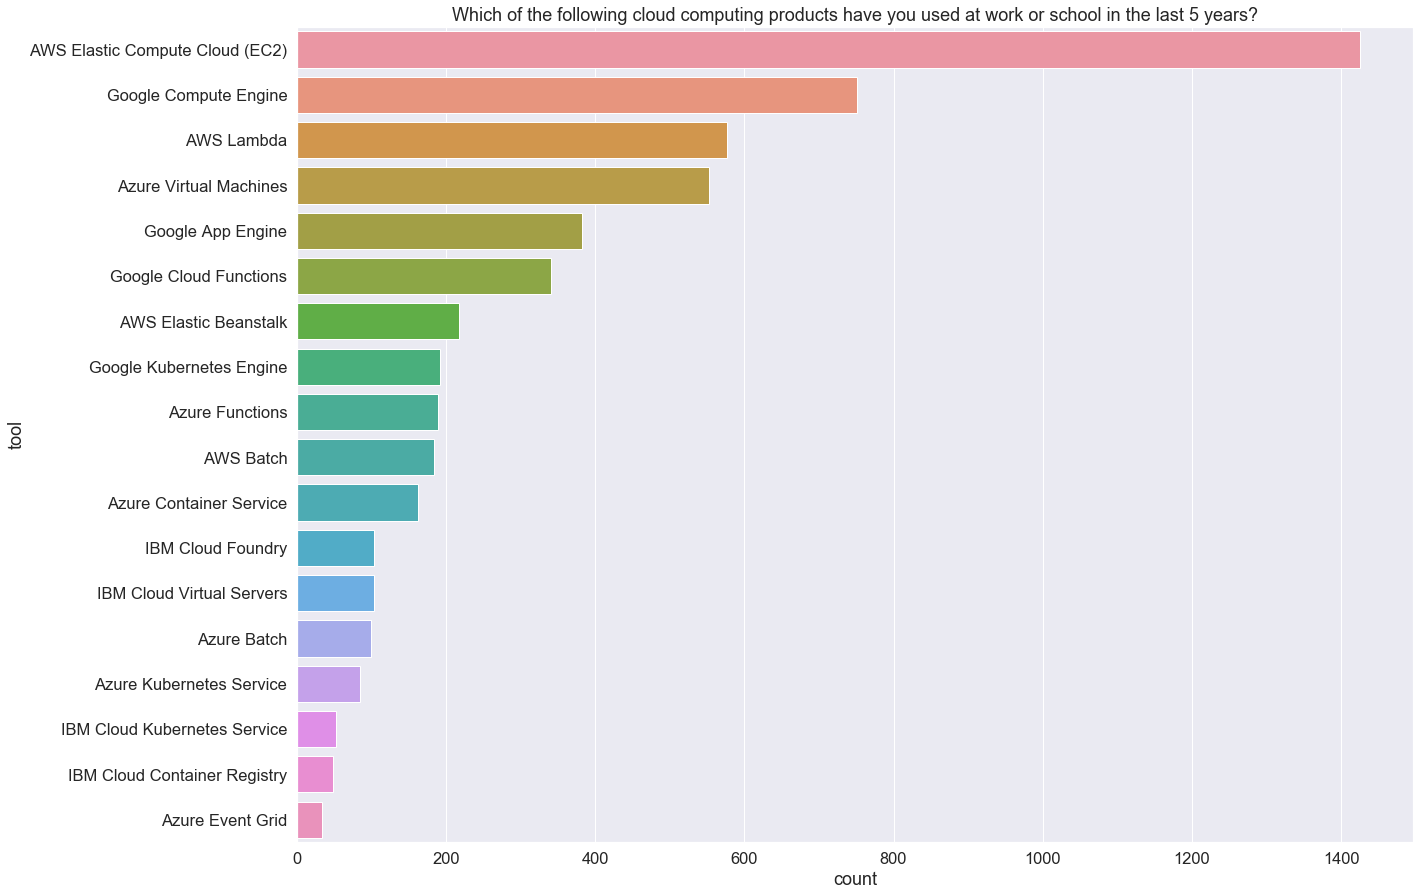

In [67]:
plt.figure(figsize=(20,15))
plt.title('Which of the following cloud computing products have you used at work or school in the last 5 years?')
plot_df(cl_df)

In [68]:
# table of data
cl_df

,tool,count,data
0,AWS Elastic Compute Cloud (EC2),1425,All
1,Google Compute Engine,751,All
5,AWS Lambda,577,All
8,Azure Virtual Machines,553,All
3,Google App Engine,382,All
6,Google Cloud Functions,341,All
2,AWS Elastic Beanstalk,217,All
4,Google Kubernetes Engine,192,All
10,Azure Functions,189,All
7,AWS Batch,184,All


# How do applicants learn ML ?

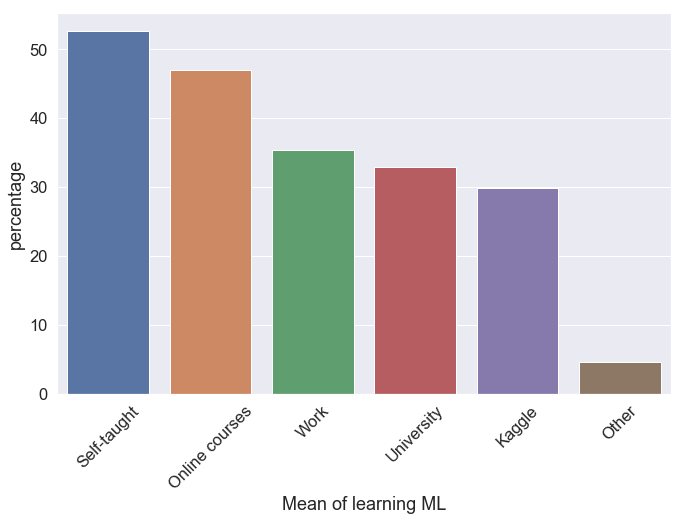

In [30]:
tmp ={
    'Self-taught' : (df_multipleChoice['Q35_Part_1'].astype(float)>0).sum(),
    'Online courses' : (df_multipleChoice['Q35_Part_2'].astype(float)>0).sum(),
    'Work'  :(df_multipleChoice['Q35_Part_3'].astype(float)>0).sum(),
    'University' : (df_multipleChoice['Q35_Part_4'].astype(float)>0).sum(),
    'Kaggle' : (df_multipleChoice['Q35_Part_5'].astype(float)>0).sum(),
    'Other' : (df_multipleChoice['Q35_Part_6'].astype(float)>0).sum(),
}


tmp = round(100*pd.DataFrame.from_dict(tmp, orient='index')/len(df_multipleChoice),2)
tmp.reset_index(inplace=True)
tmp.rename(columns={"index": "Mean of learning ML", 0 : "percentage"}, inplace=True)
tmp.sort_values(by='percentage', ascending=False, inplace=True)

plt.figure(figsize=(11,7))
sns.set(font_scale=1.5)
p = sns.barplot(x="Mean of learning ML", y="percentage", data=tmp)
_ = plt.setp(p.get_xticklabels(), rotation=45)

## Respondents could have multiple choices (so probably a lot of people that checked self-taught also checked online courses).
## More than half the respondents consider themself to be self-taught while only 30% consider that University played a role in their teaching. 

# Which platforms are mainly used for online learning ?

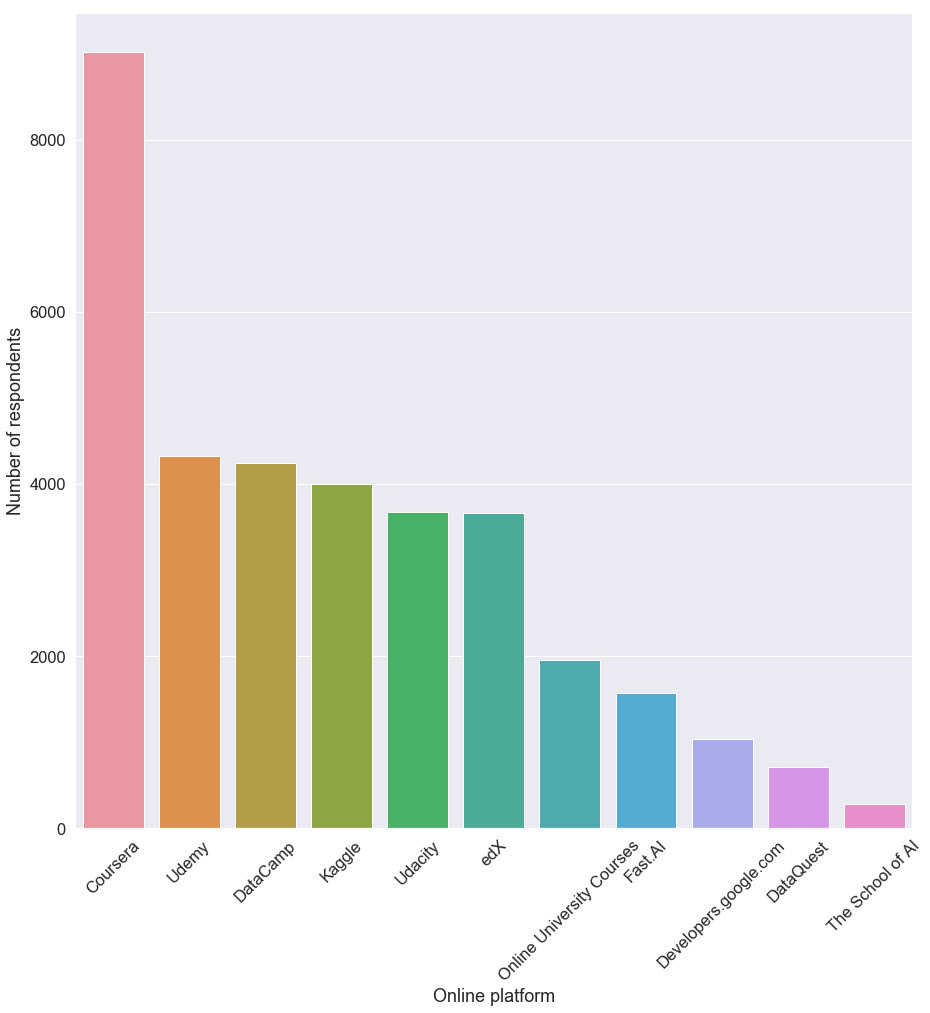

In [188]:
tmp_dict = {
    'Coursera' : (df_multipleChoice['Q36_Part_2'].count()),
    'Udemy' : (df_multipleChoice['Q36_Part_9'].count()),
    'DataCamp' : (df_multipleChoice['Q36_Part_4'].count()),
    'Kaggle' : (df_multipleChoice['Q36_Part_6'].count()),
    'Udacity' : (df_multipleChoice['Q36_Part_1'].count()),
    'edX' : (df_multipleChoice['Q36_Part_3'].count()),
    'Online University Courses' : (df_multipleChoice['Q36_Part_11'].count()),
    'Fast.AI' : (df_multipleChoice['Q36_Part_7'].count()),
    'Developers.google.com' : (df_multipleChoice['Q36_Part_8'].count()),
    'DataQuest' : (df_multipleChoice['Q36_Part_5'].count()),
    'The School of AI' : (df_multipleChoice['Q36_Part_10'].count())
}


tmp = pd.DataFrame.from_dict(tmp_dict, orient='index')
tmp.reset_index(inplace=True)
tmp.rename(columns={"index": "Online platform", 0 : "Number of respondents"}, inplace=True)
tmp.sort_values(by='Number of respondents', ascending=False, inplace=True)

plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
p = sns.barplot(x="Online platform", y="Number of respondents", data=tmp)
_ = plt.setp(p.get_xticklabels(), rotation=45)

## In this case, respondents could have multiple choices as well. Coursera took up the top of respondents with the big gap.

# What about how efficient those platforms are compared to university ?

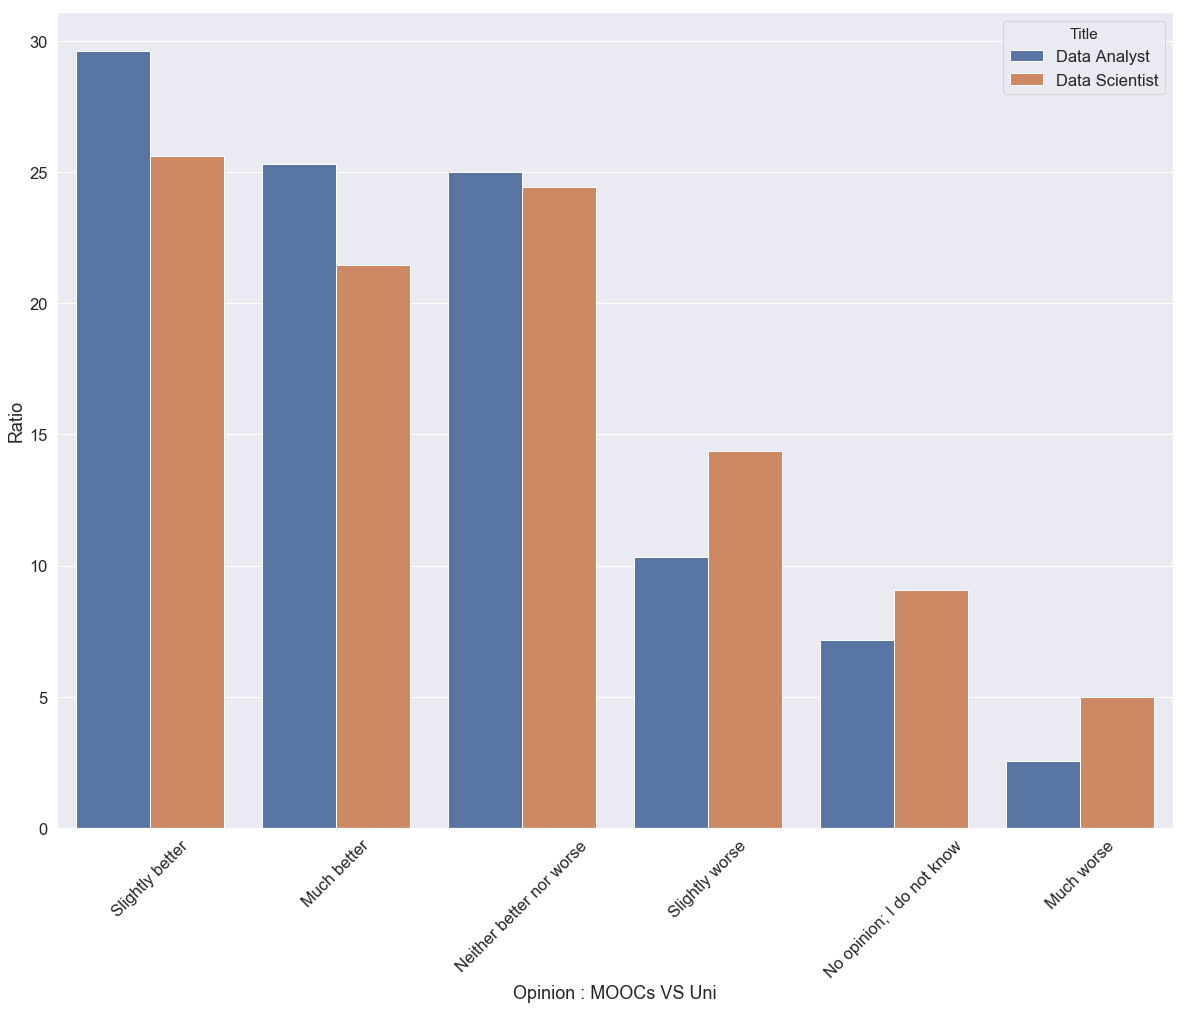

In [75]:
education_comp = (filt_df.groupby(['Q6'])['Q39_Part_1']
             .value_counts(normalize=True)
             .rename('Ratio')
             .mul(100)
             .reset_index()
             .sort_values('Ratio', ascending=False))

education_comp.rename(columns={"Q39_Part_1": "Opinion : MOOCs VS Uni", "Q6": "Title"}, inplace=True)

plt.figure(figsize=(20,15))
p = sns.barplot(x="Opinion : MOOCs VS Uni", y="Ratio", hue="Title", data=education_comp)
_ = plt.setp(p.get_xticklabels(), rotation=45)

## More than 55% of respondents find that online courses are either slightly better or much better than what they get in universities. In other words, the online courses are providing a much needed content to students from countries that either can't study ML at their schools or have courses that aren't that good.

# Who/what are your favorite media sources that report on data science topics?

## Another source of ML and DS knowledge are the numerous media sources that in 2018 report on data science topics. This survey question again allows for multiple picks of favourite media. Here’s a quick overview without going into much depth:

In [76]:
# the number of question is 38, 22 - a quantity of multiple Choice Responses
all_df = got_count_q(38, 23, df_multipleChoice, 'All')

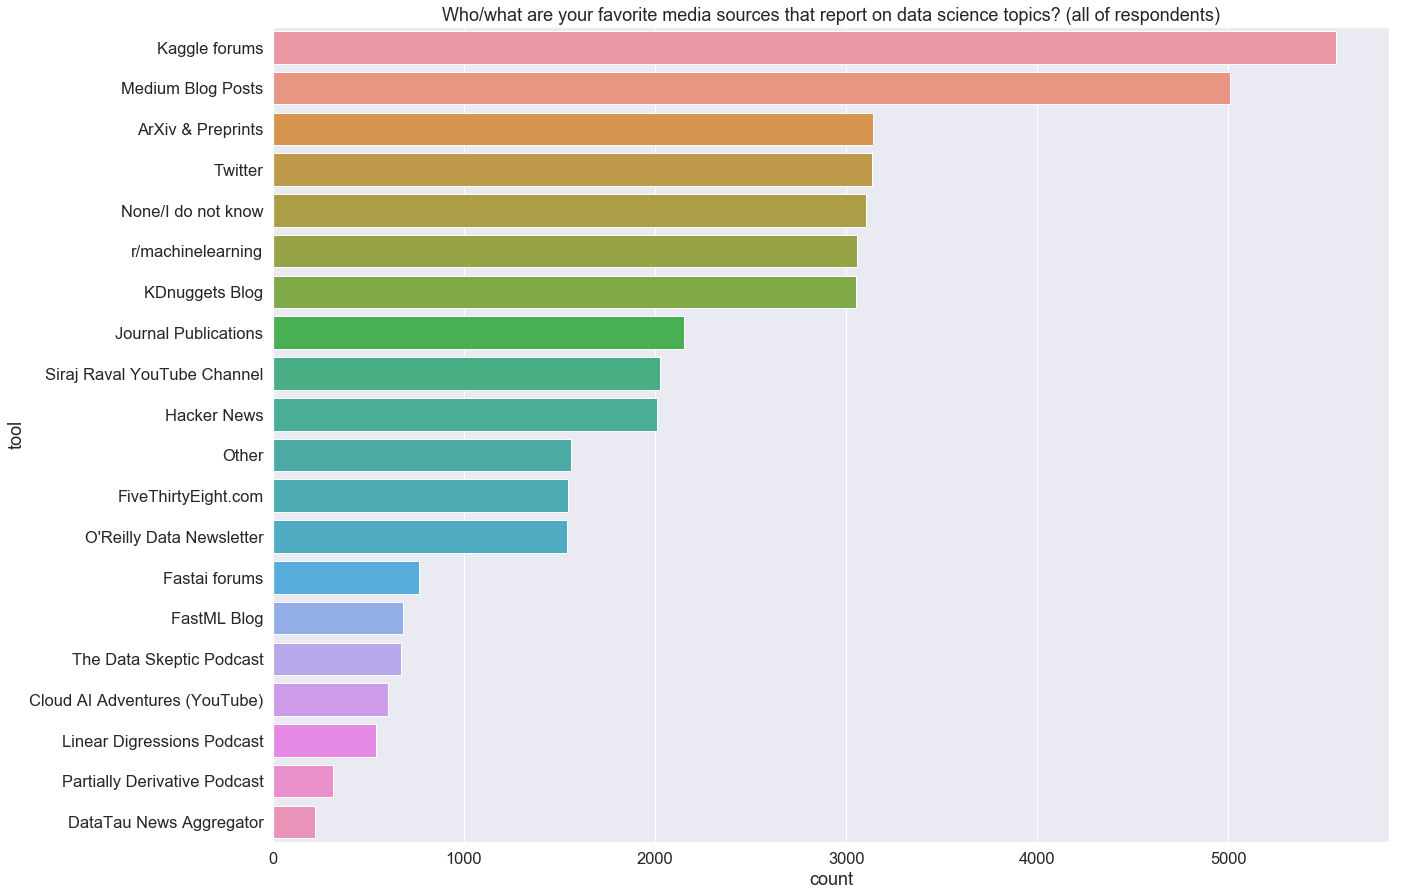

In [79]:
plt.figure(figsize=(20,15))
plt.title('Who/what are your favorite media sources that report on data science topics? (all of respondents)')
plot_df(all_df)

In [80]:
# the number of question is 38, 22 - a quantity of multiple Choice Responses
f_df = got_count_q(38, 23, filt_df, 'SC')

# the data for only "Data Scientist" or "Data Analyst"

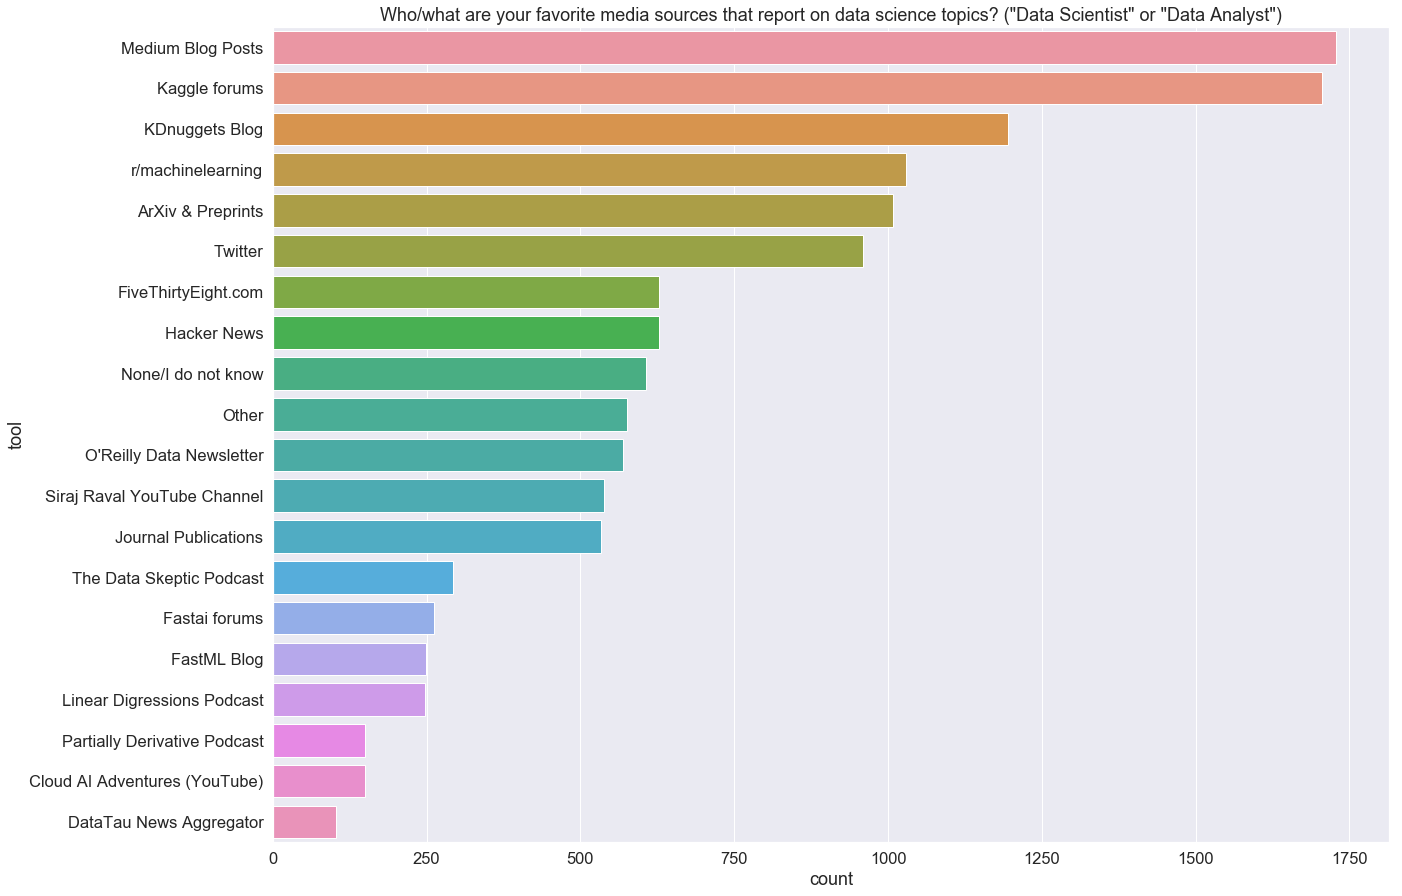

In [175]:
plt.figure(figsize=(20,15))
plt.title('Who/what are your favorite media sources that report on data science topics? ("Data Scientist" or "Data Analyst")')
plot_df(f_df)

### Media sources might be helpful to understand current industry trends, to stay on top of the latest news. There is a big part of how to stay competitive, remain valuable, and grow own expertise.

# % Time spent in a ML/DS Project on (for Data Analyst and Data Scientist)

In [39]:
columns = []
time_spentnaim = []
naim_columns = "Q34_Part_" 
for i in range(1,7):
    columns.append(naim_columns + str(i))
    q = multipleChoice_q[naim_columns + str(i)][0]
    f = q.rfind(' - ') + 3
    time_spentnaim.append(q[f:]) 

In [42]:
#filtered unchoosed data
df_time = filt_df[columns][df_multipleChoice['Q34_OTHER_TEXT'] != -1]

In [43]:
# to correct data to 100%
def valuation_formula(x):
    return max(100 - sum(x),0)

df_time['other'] = df_time.apply(lambda row: valuation_formula(row), axis=1)

In [44]:
df_time.describe()

,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,other
count,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000
mean,16.276890,25.771938,13.682481,19.044302,9.486262,12.849148,2.888978
std,13.473408,15.386635,9.717837,12.932585,9.420545,10.471782,8.517282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,15.000000,10.000000,10.000000,0.000000,5.000000,0.000000
50%,10.000000,25.000000,10.000000,20.000000,10.000000,10.000000,0.000000
75%,20.000000,30.000000,20.000000,25.000000,15.000000,20.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [45]:
time_spentnaim

['Gathering data',
 'Cleaning data',
 'Visualizing data',
 'Model building/model selection',
 'Putting the model into production',
 'Finding insights in the data and communicating with stakeholders']

In [46]:
df_time = df_time[df_time['other'] < 99]

In [47]:
time_spentnaim.append('other')

In [48]:
df_time_ = df_time.sum()

In [49]:
df_time_

Q34_Part_1     76420.00
Q34_Part_2    120999.25
Q34_Part_3     64239.25
Q34_Part_4     89412.00
Q34_Part_5     44538.00
Q34_Part_6     60326.75
other          11764.75
dtype: float64

In [50]:
df_time_.sum()/15937

29.346803036958022

In [51]:
_df = pd.DataFrame(df_time_.values, index=time_spentnaim)

In [52]:
_df = _df.rename(columns={0: "time"})

In [53]:
_df

,time
Gathering data,76420.00
Cleaning data,120999.25
Visualizing data,64239.25
Model building/model selection,89412.00
Putting the model into production,44538.00
Finding insights in the data and communicating with stakeholders,60326.75
other,11764.75


In [54]:
_df = _df.apply(lambda x: x/15937)

In [55]:
_df = _df.apply(lambda x: round(x,2))

In [56]:
_df.values.sum()

29.349999999999998

In [57]:
_df

,time
Gathering data,4.80
Cleaning data,7.59
Visualizing data,4.03
Model building/model selection,5.61
Putting the model into production,2.79
Finding insights in the data and communicating with stakeholders,3.79
other,0.74


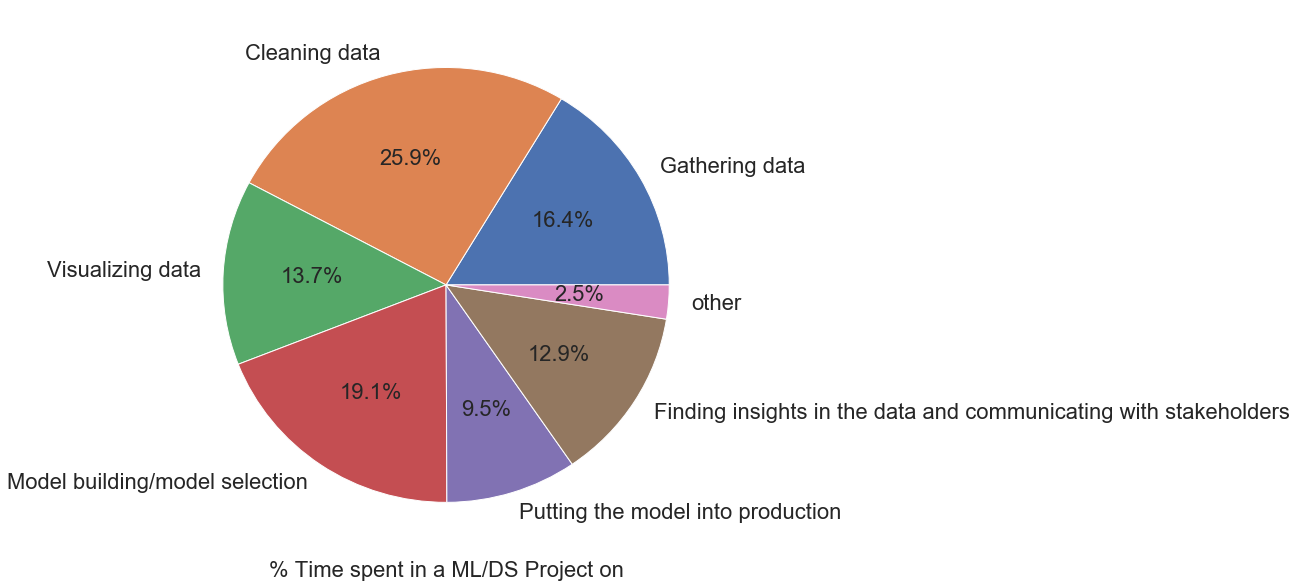

In [58]:
px = _df['time'].plot.pie(figsize=(10,10),autopct='%.1f%%',fontsize=22) 
px.set_xlabel('% Time spent in a ML/DS Project on', fontsize=22)
px.get_yaxis().set_visible(False)

# Importance in ML

## extra properties required from data sceintists

 'Fairness and bias in ML algorithms:',
 'Being able to explain ML model outputs and/or predictions',
 'Reproducibility in data science'

In [142]:
columns = []
time_spentnaim = []
naim_columns = "Q41_Part_" 
for i in range(1,4):
    columns.append(naim_columns + str(i))
    q = multipleChoice_q[naim_columns + str(i)][0]
    f = q.rfind(' - ') + 3
    time_spentnaim.append(q[f:]) 

In [143]:
df_ml = filt_df[columns]

In [144]:
df_ml.dropna(axis=0,subset=['Q41_Part_1','Q41_Part_2','Q41_Part_3'],inplace=True)

In [145]:
df_ml.describe()

,Q41_Part_1,Q41_Part_2,Q41_Part_3
count,4431,4431,4431
unique,4,4,4
top,Very important,Very important,Very important
freq,2641,2918,3223


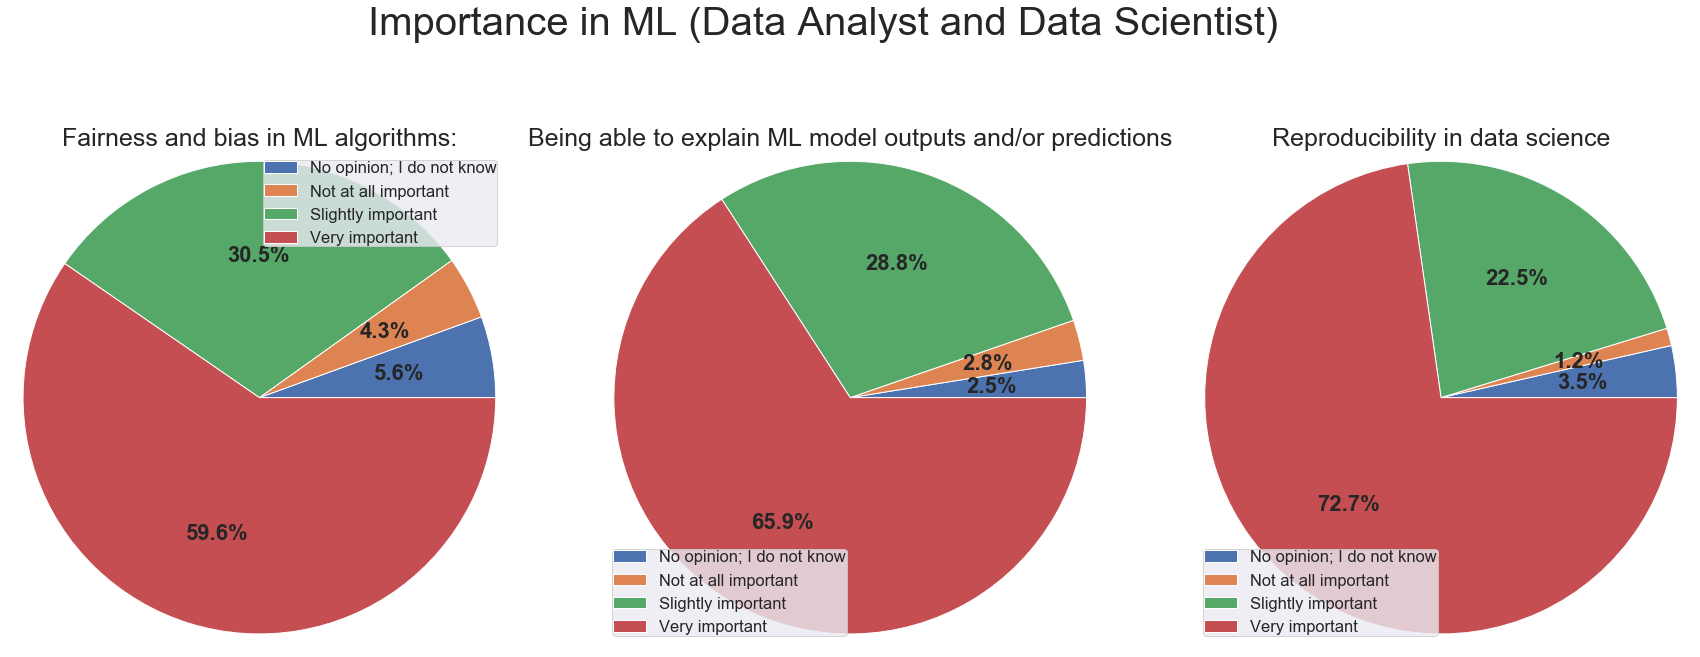

In [146]:
from matplotlib.gridspec import GridSpec
# Make square figures and axes
plt.figure(1, figsize=(30,20))
the_grid = GridSpec(2, 3)

ax = plt.subplot(the_grid[0, 0], aspect=1, title=time_spentnaim[0])
wedges, texts, autotexts = plt.pie(df_ml.groupby('Q41_Part_1')['Q41_Part_1'].count(), autopct='%.1f%%', radius=1.2)
plt.setp(autotexts, size=22, weight="bold")
ax.title.set_size(25)

ax1 = plt.subplot(the_grid[0, 1], aspect=1, title=time_spentnaim[1])
wedges1, texts1, autotexts1 = plt.pie(df_ml.groupby('Q41_Part_2')['Q41_Part_2'].count(), autopct='%.1f%%', radius=1.2)
plt.setp(autotexts1, size=22, weight="bold")
ax1.title.set_size(25)

ax2 = plt.subplot(the_grid[0, 2], aspect=1, title=time_spentnaim[2])
wedges2, texts2, autotexts2 = plt.pie(df_ml.groupby('Q41_Part_3')['Q41_Part_3'].count(), autopct='%.1f%%', radius=1.2)
plt.setp(autotexts2, size=22, weight="bold")
ax2.title.set_size(25)

ax.legend(df_ml.groupby('Q41_Part_1')['Q41_Part_1'].count().index,loc=0,borderpad=0.05)  
ax1.legend(df_ml.groupby('Q41_Part_2')['Q41_Part_2'].count().index,loc=0,borderpad=0.05)  
ax2.legend(df_ml.groupby('Q41_Part_3')['Q41_Part_3'].count().index,loc=0,borderpad=0.05)  

plt.suptitle('Importance in ML (Data Analyst and Data Scientist)', fontsize=40)
plt.show()


## Obviously, most of the respondents are sure to extra properties required from data scientists but quarter one's do not know and it is weird to evident.

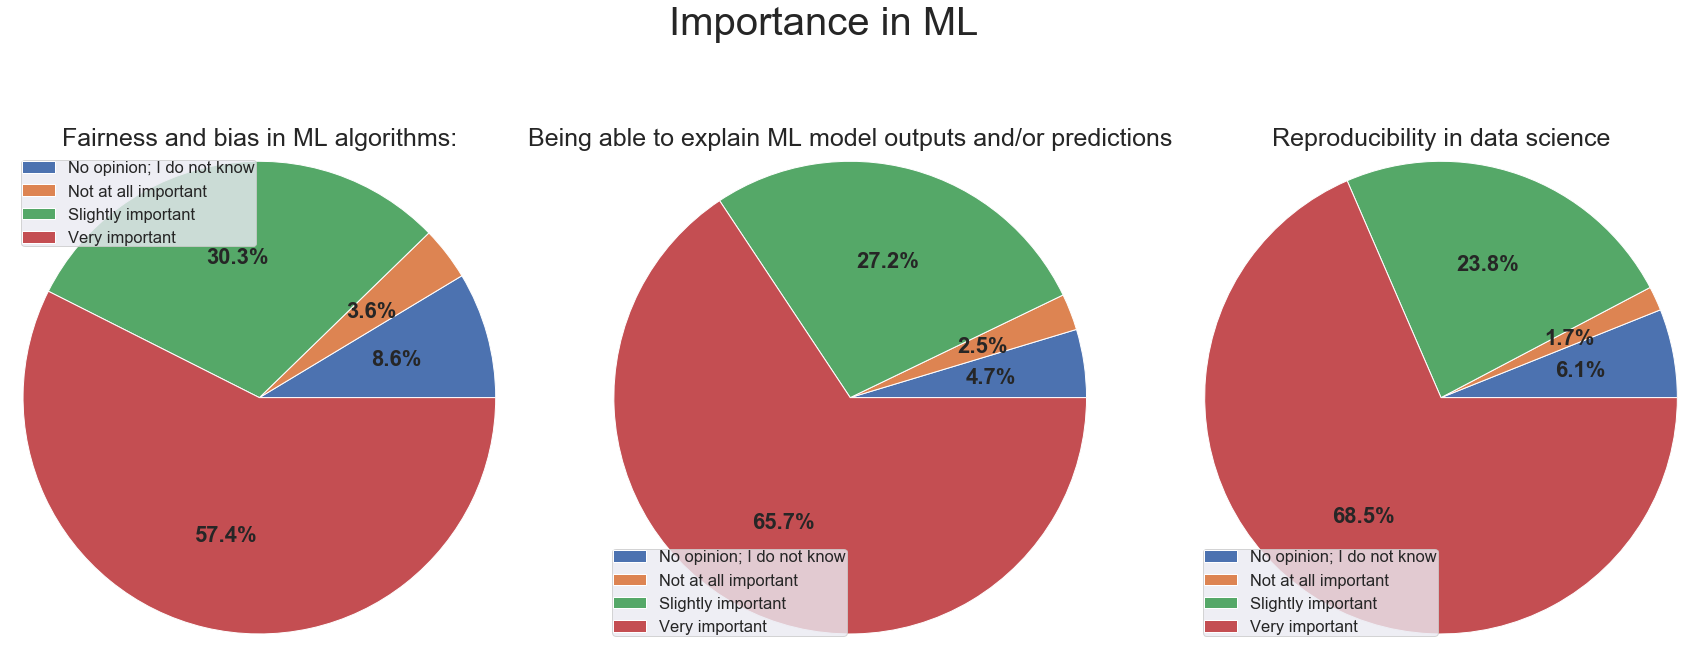

In [147]:
df_ml = df_multipleChoice[columns]
df_ml.dropna(axis=0,subset=['Q41_Part_1','Q41_Part_2','Q41_Part_3'],inplace=True)
plt.figure(1, figsize=(30,20))
the_grid = GridSpec(2, 3)

ax = plt.subplot(the_grid[0, 0], aspect=1, title=time_spentnaim[0])
wedges, texts, autotexts = plt.pie(df_ml.groupby('Q41_Part_1')['Q41_Part_1'].count(), autopct='%.1f%%', radius=1.2)
plt.setp(autotexts, size=22, weight="bold")
ax.title.set_size(25)

ax1 = plt.subplot(the_grid[0, 1], aspect=1, title=time_spentnaim[1])
wedges1, texts1, autotexts1 = plt.pie(df_ml.groupby('Q41_Part_2')['Q41_Part_2'].count(), autopct='%.1f%%', radius=1.2)
plt.setp(autotexts1, size=22, weight="bold")
ax1.title.set_size(25)

ax2 = plt.subplot(the_grid[0, 2], aspect=1, title=time_spentnaim[2])
wedges2, texts2, autotexts2 = plt.pie(df_ml.groupby('Q41_Part_3')['Q41_Part_3'].count(), autopct='%.1f%%', radius=1.2)
plt.setp(autotexts2, size=22, weight="bold")
ax2.title.set_size(25)

ax.legend(df_ml.groupby('Q41_Part_1')['Q41_Part_1'].count().index,loc=0,borderpad=0.05)  
ax1.legend(df_ml.groupby('Q41_Part_2')['Q41_Part_2'].count().index,loc=0,borderpad=0.05)  
ax2.legend(df_ml.groupby('Q41_Part_3')['Q41_Part_3'].count().index,loc=0,borderpad=0.05)  

plt.suptitle('Importance in ML', fontsize=40)
plt.show()

In [148]:
df_ml.describe()

,Q41_Part_1,Q41_Part_2,Q41_Part_3
count,14936,14936,14936
unique,4,4,4
top,Very important,Very important,Very important
freq,8578,9810,10231


## The same result for whole disdribition.

##  Last questions are explored to realize useful information

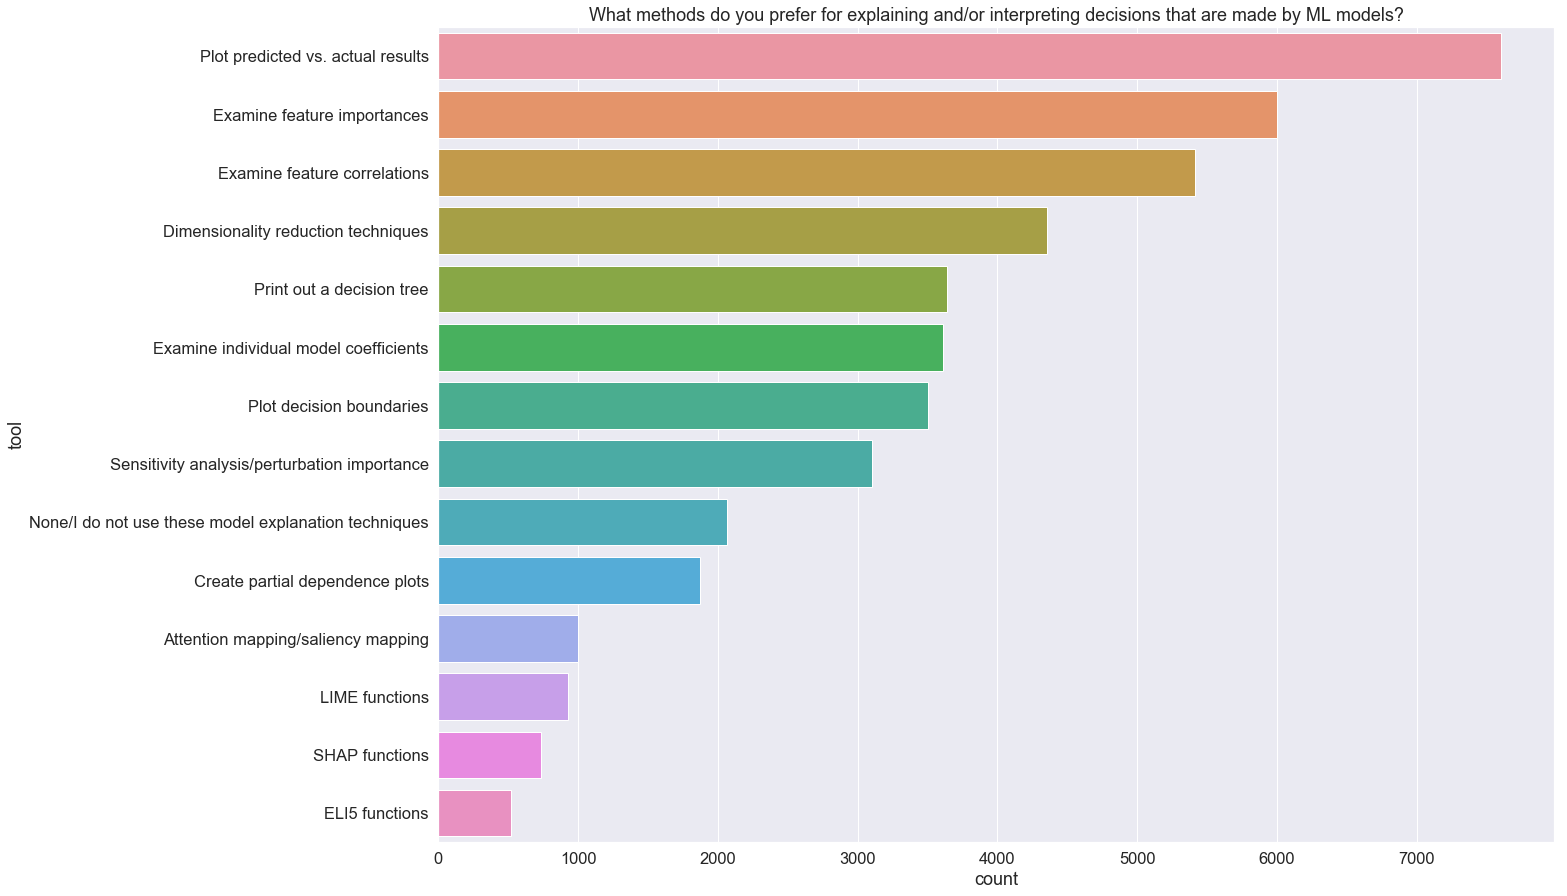

In [155]:
all_df = got_count_q(47, 15, df_multipleChoice, 'All')
plt.figure(figsize=(20,15))
plt.title('What methods do you prefer for explaining and/or interpreting decisions that are made by ML models?')
plot_df(all_df)

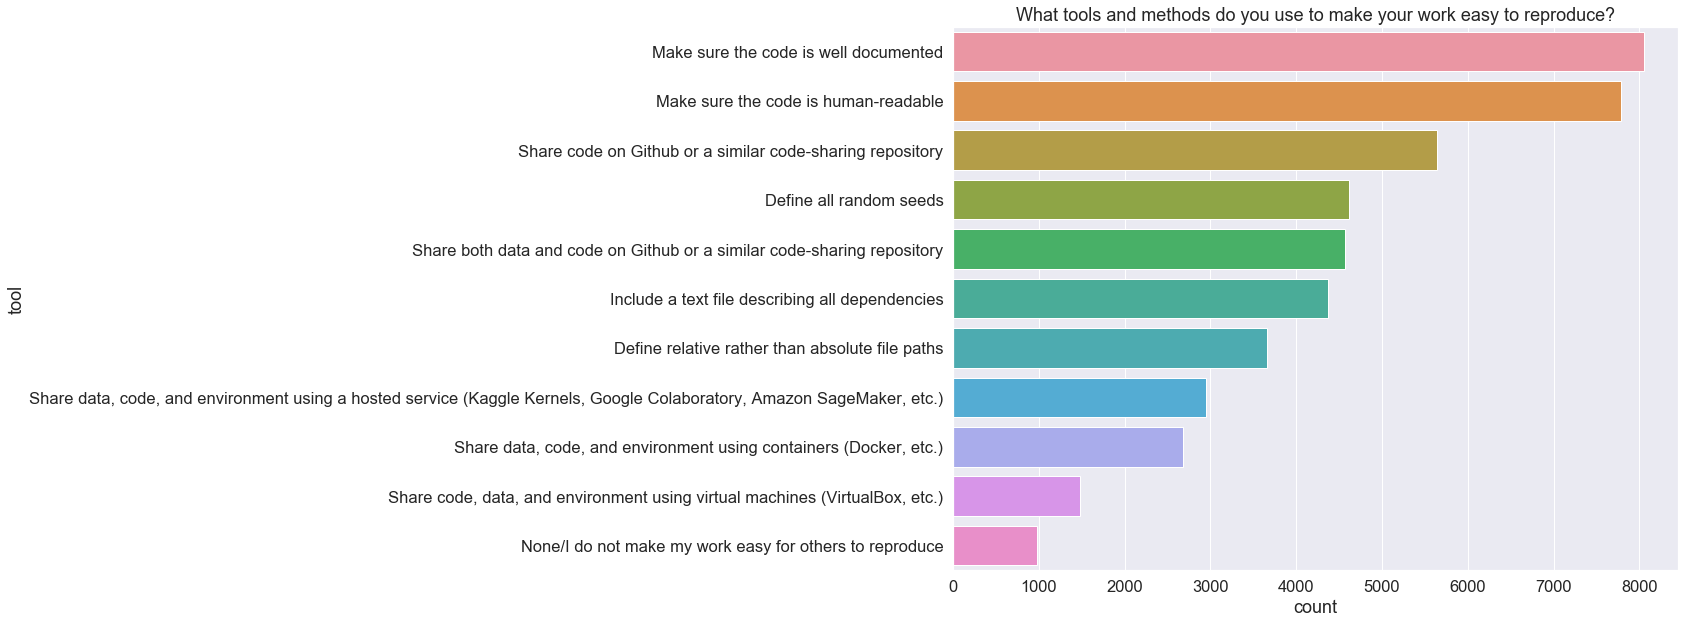

In [162]:
all_df = got_count_q(49, 12, df_multipleChoice, 'All')
plt.figure(figsize=(13,10))
plt.title('What tools and methods do you use to make your work easy to reproduce?')
plot_df(all_df)

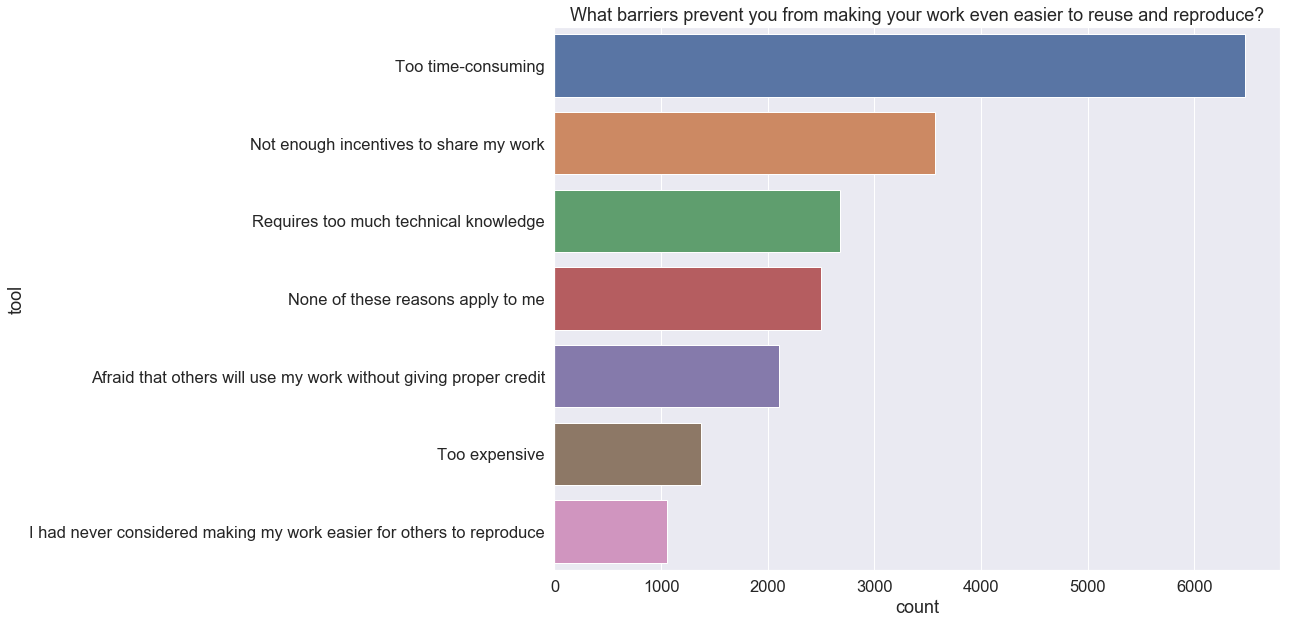

In [164]:
all_df = got_count_q(50, 8, df_multipleChoice, 'All')
plt.figure(figsize=(13,10))
plt.title('What barriers prevent you from making your work even easier to reuse and reproduce?')
plot_df(all_df)

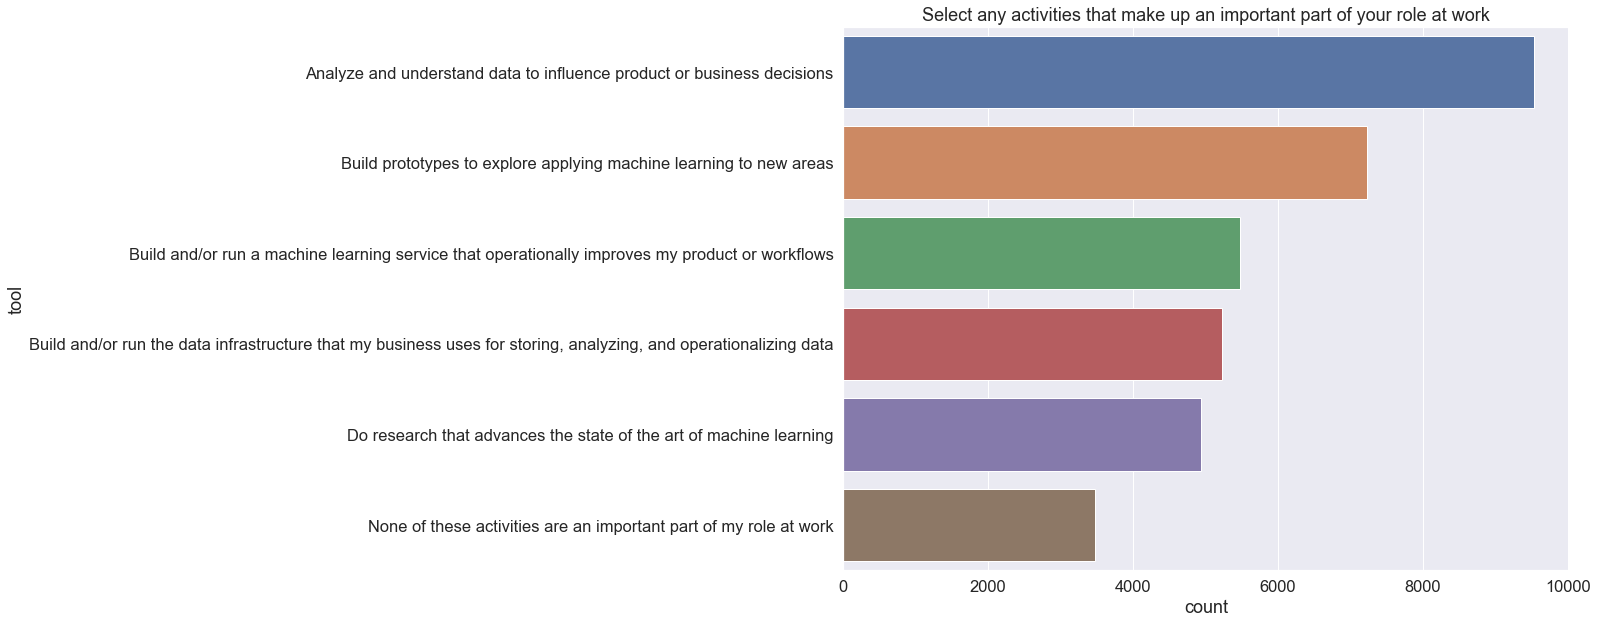

In [165]:
all_df = got_count_q(11, 7, df_multipleChoice, 'All')
plt.figure(figsize=(13,10))
plt.title('Select any activities that make up an important part of your role at work')
plot_df(all_df)